<a href="https://colab.research.google.com/github/DemitriusBR/EDA_e_RFM/blob/main/EDA_e_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUÇÃO DO PROJETO**

Este projeto tem como objetivo analisar as vendas de um conjunto de dados, utilizando técnicas de manipulação, limpeza e visualização dos dados para extrair insights valiosos. Iniciamos com a Limpeza dos dados em seguida  verificando a integridade e partimos para exploração dos dadose a partir de estruturação por meio de resumos estatísticos e gráficos. E para finalizar focamos em métricas de desempenho, como recência, frequência e valor monetário (RFM) para segmentar os clientes e entender seu comportamento de compra. A análise inclui a identificação dos países e produtos mais vendidos, bem como a evolução das vendas ao longo do tempo. O resultado final oferece uma base de dados a partir do RFM, permitindo direcionar estratégias de marketing e vendas de forma mais eficaz.

# BIBLIOTECAS

In [ ]:
#Bibliotecas utilizadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# IMPORT DOS DADOS

In [ ]:
#importando o banco de dados
df  = pd.read_csv("data.csv", encoding= 'unicode_escape')

In [ ]:
#Vizualição do dados
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data Cleaning

## .Describe
.describe() fornece um resumo estatístico das colunas numéricas de um DataFrame, incluindo contagem, média, desvio padrão, valores mínimo e máximo, e os quartis (25%, 50% e 75%). Isso ajuda a entender a distribuição e características dos dados de forma rápida e eficaz

In [ ]:
#Analisando a composição de dados
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## .isna() + .sum()
A função isna() gera um DataFrame booleano indicando a presença de valores nulos, e sum() calcula quantos existem por coluna. Isso ajuda a avaliar a qualidade dos dados e a orientar a limpeza necessária.

In [ ]:
#Quantificando os dados nulos
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## .Dropna()

Utilizei o código .dropna() para remover linhas com valores ausentes na coluna "CustomerID". Essa ação é importante para garantir a integridade dos dados, especialmente se essa coluna for essencial para análises como identificação de clientes como é a finalidade do projeot. A inclusão desse comando ajuda a eliminar dados incompletos, assegurando que as análises subsequentes sejam realizadas com um conjunto de dados mais confiável e completo.

In [ ]:
#Retirando os dados nulos do banco de dados
df.dropna(axis = 0, subset="CustomerID", inplace=True)

## .Info()

Utilizei o código df.info() para obter uma visão geral das características do DataFrame. Essa função exibe informações como o número de entradas, o número de colunas, os tipos de dados de cada coluna e a quantidade de valores não nulos. Ela é crucial para entender a estrutura dos dados, identificar colunas com valores ausentes e verificar os tipos de dados, facilitando assim a limpeza e a preparação dos dados para análises posteriores.

In [ ]:
#Analisando os datos em um todo
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


## .Drop() + .Query()

Utilizei os comandos para remover linhas do DataFrame onde as colunas "Quantity" e "UnitPrice" contêm valores menores ou iguais a zero. Essas ações são essenciais para que os dados sejam válidos, pois quantidades e preços não podem ser negativos ou zero em um contexto de vendas

In [ ]:
#Retirando Quantidade comprada e Preço Unitario Menor que zero
df = df.drop(df.query("Quantity <= 0").index, axis = 0)
df = df.drop(df.query("UnitPrice <=0").index, axis = 0)
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


## .Duplicated()

 A função retorna um booleano indicando quais linhas são duplicadas, mantendo todas as ocorrências. Esse comando é importante para detectar e revisar dados repetidos

In [ ]:
#Verificando as linhas duplicadas
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


## .Drop_duplicates()

Essa função identifica e elimina entradas repetidas, garantindo que cada linha seja única

In [ ]:
#Retirando as linhas que consta como duplicadas
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Avaliação dos dados após a analise inícial

Utilizei a sequência de três comandos (describe, info e head) para verificar a estrutura dos dados após uma análise inicial.

In [ ]:
#Analise a coposição do banco de dados
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
#Analisando do DTYPE das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [ ]:
#Verificando a estruturação da BASE
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## .Astype()

Utilizei o código df = df.astype() para converter os tipos de dados das colunas "CustomerID" e "InvoiceDate". Especificamente, a coluna "CustomerID" foi convertida para o tipo inteiro, e "InvoiceDate" para o formato de data e hora. Ação fundamental para tratar os dados de forma correta

In [ ]:
#Realizando a alteração do TYPE das colunas CustomerID e InvoiceDate
df = df.astype({'CustomerID':'int', 'InvoiceDate':'datetime64[ns]'})
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


## .Plot.box()


O código .plot.box() é utilizado para gerar um gráfico de caixa (boxplot) das colunas "Quantity" e "UnitPrice". Esse tipo de visualização é útil para identificar a distribuição dos dados, bem como detectar outliers e entender a variabilidade. O boxplot fornece uma representação visual clara das estatísticas descritivas, como mediana, quartis e valores extremos

<Axes: >

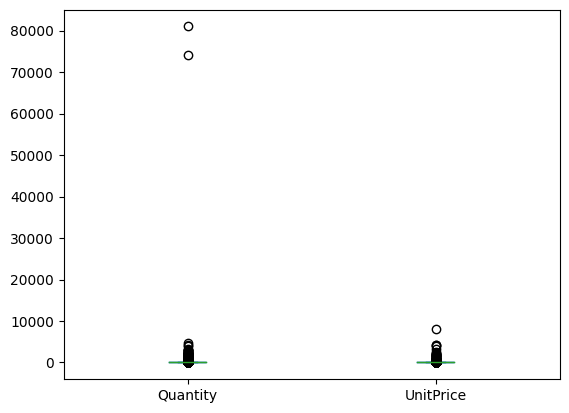

In [ ]:
#Analisando os outliers
df[["Quantity","UnitPrice"]].plot.box()

Utilizei o .query() para remover linhas do DataFrame onde as colunas "Quantity" e "UnitPrice" têm valores excessivamente altos, acima de 10.000 e 5.000, respectivamente. Essas remoções são importantes para eliminar outliers que poderiam distorcer as análises. E o .plot.bos() para verificar como ficaram os dados após a filtragem

<Axes: >

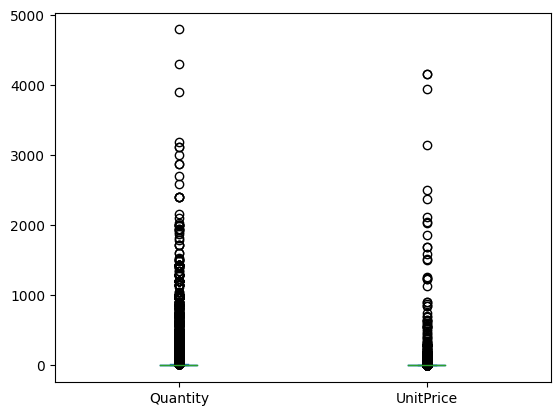

In [ ]:
# Retiradas dos Outliers
df = df.drop(df.query("Quantity > 10000").index,axis=0)
df = df.drop(df.query("UnitPrice > 5000").index,axis=0)
df[["Quantity","UnitPrice"]].plot.box()

## Criação da coluna

Coluna chamada "Preço Total", que é o resultado da multiplicação entre as colunas "Quantity" e "UnitPrice". Essa operação é para calcular o valor total das vendas, permitindo análises financeiras mais profundas, como a receita total ou o desempenho de vendas. Alem de análises futuras

In [ ]:
#Criação da coluna Preço Total que é a multiplicação da Quantity * UnitPrice
df["Preço Total"] = df["Quantity"]*df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Preço Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# EDA

Iníciei a explocação dos criando uma variavel que contem a data mais avançada, para que possa utilizar em análises futuras

## 10 Paises que mais venderam

Iníciei a explocação dos criando uma variavel que contem a data mais avançada, para que possa utilizar em análises futuras

In [ ]:
# Verificando qual a ultima venda
ult_venda = max(df["InvoiceDate"])

### .Groupby()

O código agrupa os dados por país, calcula a soma do "Preço Total" para cada um, ordena os resultados de forma decrescente e exibe as 10 principais entradas. Isso permite identificar os países com maior receita total em vendas.

In [ ]:
#Agrupando os total de venda por pais
agg_paises = df.groupby(["Country"])["Preço Total"].agg('sum').reset_index().sort_values("Preço Total",ascending=False)
agg_paises.reset_index(inplace=True)
agg_paises.head(10)

,index,Country,Preço Total
0,35,United Kingdom,7054595.604
1,23,Netherlands,285446.340
2,10,EIRE,265545.900
3,14,Germany,228867.140
4,13,France,209024.050
5,0,Australia,138521.310
6,30,Spain,61577.110
7,32,Switzerland,56443.950
8,3,Belgium,41196.340
9,31,Sweden,38378.330


### .Barplot()

O código limita o DataFrame agg_paises às 10 principais entradas com maior "Preço Total" e, em seguida, cria um gráfico de barras para visualizar a receita total por país. As labels do eixo x são rotacionadas para facilitar a leitura, permitindo uma comparação clara entre os principais mercados.

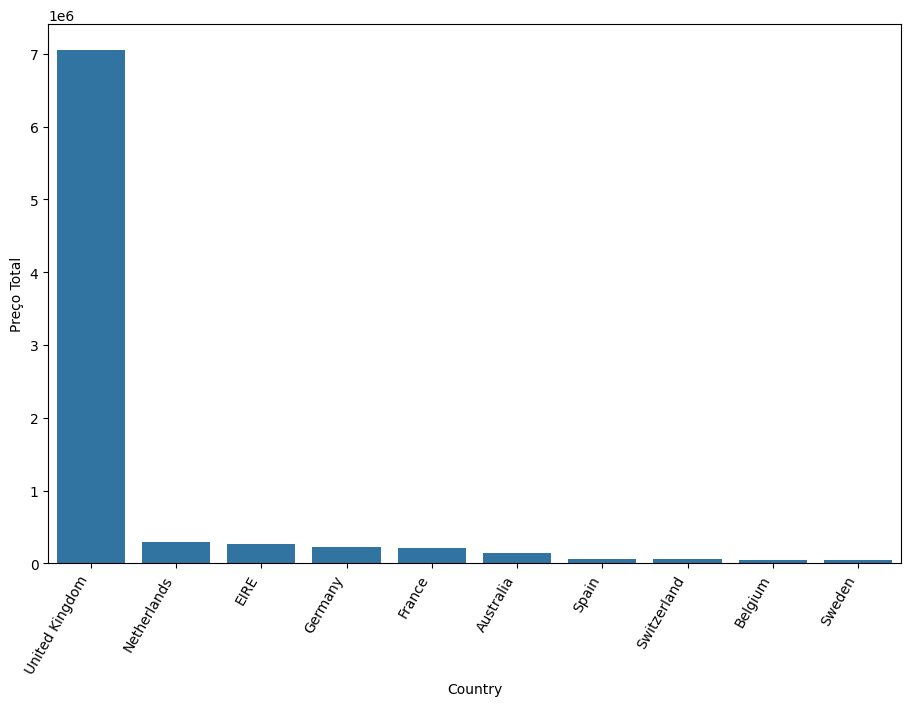

In [ ]:
#Limitar apenas os  paises
top10_paises = agg_paises.loc[agg_paises.index <= 9]
#Plotando o grafico de barra
plt.figure(figsize=(11,7))
plt.xticks(rotation=60, ha="right")
sns.barplot(top10_paises, x="Country", y = "Preço Total", );

## 10 Produtos mais vendidos


### .Groupby

Seguindo o modelo anterior realizei um agrupamento dos dados por "StockCode" e calcula a soma da quantidade vendida "Quantity" para cada produto, no qual organizei de forma decrecente dos mais vendidos.

In [ ]:
#Agrupando os produtos mais vendidos
agg_produtos = df.groupby(["StockCode"])["Quantity"].agg('sum').reset_index().sort_values("Quantity",ascending=False)
agg_produtos.reset_index(inplace=True)
agg_produtos.head(10)

,index,StockCode,Quantity
0,2803,84077,54415
1,1088,22197,49183
2,3218,85099B,46181
3,3232,85123A,36782
4,3058,84879,35362
5,423,21212,33693
6,1919,23084,27202
7,1352,22492,26076
8,1469,22616,25345
9,910,21977,24264


### .Barplot

O código limita aos 10 produtos mais vendidos e, em seguida, cria um gráfico de barras para visualizar a quantidade vendida desses itens. Essa visualização permite uma comparação clara entre os produtos mais populares, ajudando a identificar quais itens têm melhor desempenho nas vendas

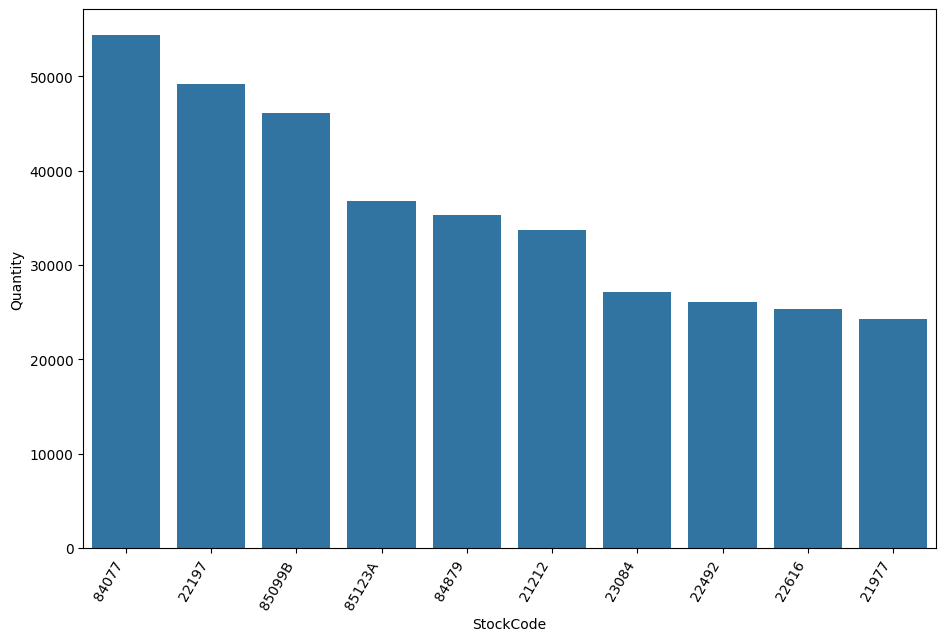

In [ ]:
#Limitando apenas os 10 primeiros produtos
top_prod = agg_produtos.loc[agg_produtos.index <= 9]
#Plotando o grafico de barras para os produtos mais vendidos
plt.figure(figsize=(11,7))
plt.xticks(rotation=60, ha="right")
sns.barplot(top_prod, x="StockCode", y = "Quantity", );

## Vendas por mês


O código agrupa as vendas por mês, configurando "InvoiceDate" como o índice do DataFrame e ordenando-o. Em seguida, utiliza resample("M").sum() para somar a quantidade vendida ("Quantity") para cada mês. O resultado, fornece uma visão mensal das vendas, permitindo analisar tendências ao longo do tempo

In [ ]:
#Agrupando as vendas por mes
data = df.set_index('InvoiceDate').sort_index()
agg_data = data[["Quantity"]].resample("M").sum()
agg_data.head()

,Quantity
InvoiceDate,
2010-12-31,312265
2011-01-31,274883
2011-02-28,265622
2011-03-31,348503
2011-04-30,292222


### Tendência
O código cria um gráfico de linhas para mostrar a quantidade de produtos vendidos por mês. Ele define as variáveis para as datas e as quantidades, configura o tamanho da figura, plota os dados, rotula os eixos e adiciona uma legenda. Por fim, exibe o gráfico, permitindo visualizar a tendência das vendas ao longo do tempo.





In [ ]:
#Criação das variaveis que serão utilizadas no Grafico
periodo =  agg_data
x= agg_data.index
y =agg_data["Quantity"]

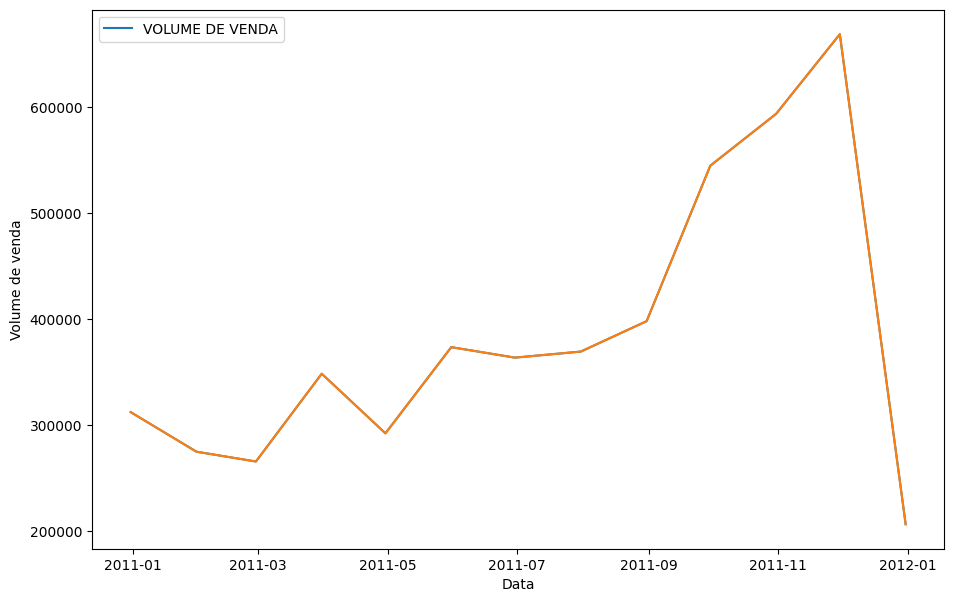

In [ ]:
#Criação do Grafico em linhas mostrando a quantidade de produtos vendidos por mês
plt.figure(figsize=(11,7))
plt.plot(x, y, periodo)
plt.xlabel("Data")
plt.ylabel("Volume de venda")
plt.legend(["VOLUME DE VENDA"])
plt.show();

## Tendência de venda do top 10 paises


 O código filtra os dados de vendas para incluir apenas os registros dos 10 principais países. Ele cria uma nova coluna 'Data' com o formato 'mês/ano' e, em seguida, retém apenas as linhas onde o país está na lista dos top 10. O resultado é um DataFrame focado nas vendas desses países.





In [ ]:
#Filtrando os dados de venda de acordo com o Top 10 pais
data['Data'] = data.index.strftime('%m/%Y')
data = data[data['Country'].isin(top10_paises['Country'])]
data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Preço Total,Data
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,12/2010
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34,12/2010
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00,12/2010
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34,12/2010
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34,12/2010
...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20,12/2011
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60,12/2011
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60,12/2011



O código agrupa os dados por país e por mês, somando o "Preço Total" para cada combinação. O resultado é armazenado em uma variavel chamada "agg_final", que é organizado por data, permitindo analisar a receita total de vendas por país ao longo do tempo.

In [ ]:
#Agrupando a quantidade venda total por pais e mes
agg_final = data.groupby(["Country", "Data"])["Preço Total"].agg('sum').reset_index().sort_values("Data")
agg_final

,Country,Data,Preço Total
0,Australia,01/2011,9017.71
38,France,01/2011,17740.12
64,Netherlands,01/2011,26611.16
77,Spain,01/2011,10086.09
25,EIRE,01/2011,21904.19
...,...,...,...
50,France,12/2011,7276.92
37,EIRE,12/2011,6978.92
24,Belgium,12/2011,1417.73
102,Sweden,12/2011,238.00


### .Plot()

Gerei um gráfico de linhas para visualizar a receita total de vendas por país ao longo do tempo. Ele plota uma linha para cada país, ajusta o eixo x para exibir as datas e adiciona uma legenda. Isso facilita a comparação das tendências de vendas entre os diferentes países.

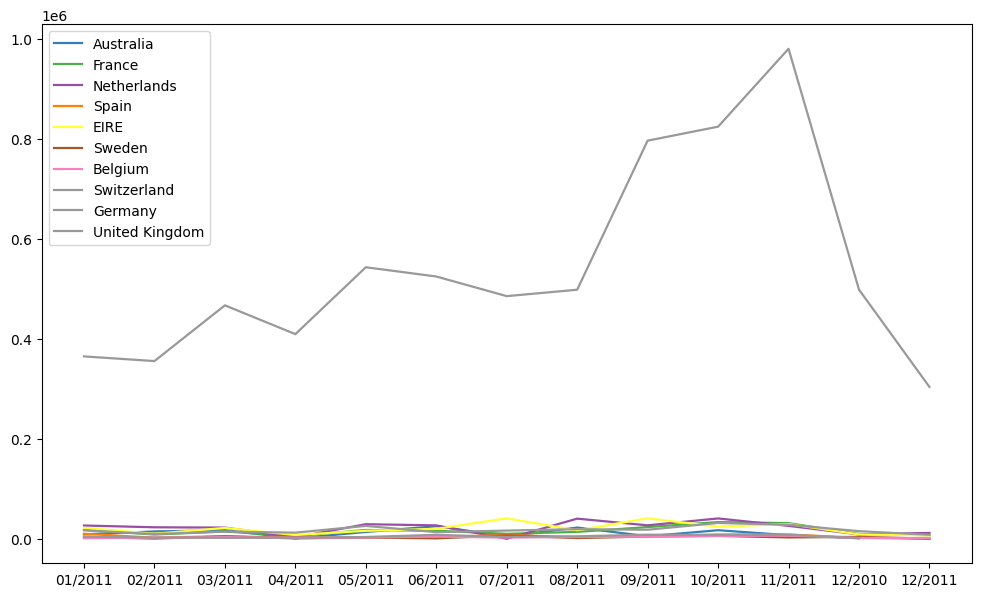

In [ ]:
#Criação do grafico mostrando a quantidade de venda por mes de cada pais
plt.figure(figsize=(12,7))
palette = plt.get_cmap('Set1')
n = 0
for value in agg_final['Country'].unique():
  n += 1
  country = agg_final.loc[agg_final['Country'] == value]
  plt.plot(country['Data'], country['Preço Total'], marker='', color=palette(n), linewidth=1.6, alpha=1, label=value)
  plt.xticks(ticks=country['Data'])
  plt.legend();

# Análise do RFM

O código agrupa os dados por "CustomerID", "InvoiceNo" e "InvoiceDate", somando as colunas "Quantity" e "Preço Total" para cada combinação. O resultado é armazenado no DataFrame rfm, que é então ordenado por "CustomerID" em ordem crescente e os índices são redefinidos. O DataFrame final rfm contém informações agregadas sobre as compras de cada cliente, facilitando análises posteriores, como a aplicação de modelos RFM (Recência, Frequência e Valor Monetário).

In [ ]:
#Agrupando a quantidade e o total de vendas pelo Cliente, pedido e Data
rfm = df.groupby(['CustomerID', 'InvoiceNo', 'InvoiceDate'])[['Quantity', 'Preço Total']].agg('sum')
rfm = rfm.sort_values('CustomerID', ascending=True ).reset_index()
rfm

,CustomerID,InvoiceNo,InvoiceDate,Quantity,Preço Total
0,12347,537626,2010-12-07 14:57:00,319,711.79
1,12347,542237,2011-01-26 14:30:00,315,475.39
2,12347,549222,2011-04-07 10:43:00,483,636.25
3,12347,556201,2011-06-09 13:01:00,196,382.52
4,12347,562032,2011-08-02 08:48:00,277,584.91
...,...,...,...,...,...
18554,18283,557956,2011-06-23 19:20:00,157,203.81
18555,18283,580872,2011-12-06 12:02:00,142,208.00
18556,18287,570715,2011-10-12 10:23:00,990,1001.32
18557,18287,554065,2011-05-22 10:39:00,488,765.28


## Recência

O código calcula a recência de compras para cada cliente, armazenando a data da última compra em uma lista. Depois, cria um DataFrame com essas informações e calcula a recência como a diferença em dias entre uma data de referência (ult_venda) e a última compra. A coluna 'LastPurchase' é removida, resultando em um DataFrame que contém cada cliente e sua recência.

In [ ]:
#Calculando a Recência
r_only = []

for v in rfm['CustomerID'].unique():
    customer = rfm.loc[rfm['CustomerID'] == v]
    values = {'CustomerID': v, 'LastPurchase': customer['InvoiceDate'].max()}
    r_only.append(values)

r_only = pd.DataFrame(r_only)
r_only['Recency'] = (ult_venda - r_only['LastPurchase']).dt.days
r_only.drop('LastPurchase', axis=1, inplace=True)
r_only

,CustomerID,Recency
0,12347,1
1,12348,74
2,12349,18
3,12350,309
4,12352,35
...,...,...
4332,18280,277
4333,18281,180
4334,18282,7
4335,18283,3


## Frêquencia

O código calcula a frequência de compras para cada cliente. Ele cria uma lista f_only para armazenar o número de faturas ("InvoiceNo") de cada "CustomerID". Para cada cliente único, o código conta o número de faturas e armazena essa informação. Em seguida, um DataFrame é criado a partir da lista, resultando em um DataFrame f_only que contém cada cliente e sua respectiva frequência de compras.

In [ ]:
#Calculando Frêquencia de compra do cliente
f_only = []

for v in rfm['CustomerID'].unique():
    customer = rfm.loc[rfm['CustomerID'] == v]
    values = {'CustomerID': v, 'Frequency': customer['InvoiceNo'].count()}
    f_only.append(values)

f_only = pd.DataFrame(f_only)
f_only

,CustomerID,Frequency
0,12347,7
1,12348,4
2,12349,1
3,12350,1
4,12352,8
...,...,...
4332,18280,1
4333,18281,1
4334,18282,2
4335,18283,16


## Tickt Médio

O código calcula o valor monetário médio das compras para cada cliente. Ele cria uma lista t_only para armazenar a média do "Preço Total" de cada "CustomerID". Para cada cliente único, o código calcula essa média e armazena a informação. Em seguida, um DataFrame é criado a partir da lista, resultando em um DataFrame t_only que contém cada cliente e seu respectivo valor monetário médio de compras.

In [ ]:
#Calculando o Tickt Medio de cada cliente
t_only = []

for v in rfm['CustomerID'].unique():
    customer = rfm.loc[rfm['CustomerID'] == v]
    values = {'CustomerID': v, 'Monetary': customer['Preço Total'].mean()}
    t_only.append(values)

t_only = pd.DataFrame(t_only)
t_only

,CustomerID,Monetary
0,12347,615.714286
1,12348,449.310000
2,12349,1757.550000
3,12350,334.400000
4,12352,313.255000
...,...,...
4332,18280,180.600000
4333,18281,80.820000
4334,18282,89.025000
4335,18283,130.930000


# CONCLUSÃO DO RFM


O código combina os DataFrames r_only, f_only e t_only para criar um DataFrame final chamado final_rfm, que contém para cada cliente suas informações de recência, frequência e valor monetário médio. A função final_rfm.head(10) exibe as 10 primeiras entradas, permitindo uma visualização rápida das métricas RFM.

In [ ]:
#Analise geral do RFM de cada cliente
final_rfm = r_only.merge(f_only, left_on='CustomerID', right_on='CustomerID')
final_rfm = final_rfm.merge(t_only, left_on='CustomerID', right_on='CustomerID')
final_rfm.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12347,1,7,615.714286
1,12348,74,4,449.310000
2,12349,18,1,1757.550000
3,12350,309,1,334.400000
4,12352,35,8,313.255000
5,12353,203,1,89.000000
6,12354,231,1,1079.400000
7,12355,213,1,459.400000
8,12356,22,3,937.143333
9,12357,32,1,6207.670000
